# L4Fisher

1. 实现Fisher线性判别算法

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math

data1 = [
  [5, 37, 1],
  [7, 30, 1],
  [10, 35, 1],
  [11.5, 40, 1],
  [14, 38, 1],
  [12, 31, 1],

]
data2 = [
  [35, 21.5, -1],
  [39, 21.7, -1],
  [34, 16, -1],
  [37, 17, -1]
]
data1 = np.array(data1)
data2 = np.array(data2)
X1 = data1[:,:-1]
X2 = data2[:,:-1]
def Fisher():
  mean1 = 0     #期望
  mean2 = 0
  for i in range(0,len(X1)):
    mean1 += X1[i]
  for i in range(0,len(X2)):
    mean2 += X2[i]
  mean1 /= len(X1)    #协方差 
  mean2 /= len(X2)

  covariance1 = 0 
  covariance2 = 0
  for i in range(0,len(X1)):
    covariance1 += np.transpose(np.mat(X1[i] - mean1)) * np.mat(X1[i] - mean1)
  for i in range(0,len(X2)):
    covariance2 += np.transpose(np.mat(X2[i] - mean2)) * np.mat(X2[i] - mean2) 
  Sw = covariance1 + covariance2    #类内总离差
  Sw_inverse = np.linalg.inv(Sw)      #类内总离差逆
  
  W = Sw_inverse * np.transpose(np.mat(mean1 - mean2))  #W最佳投影
  S_threshold = np.transpose(W) * np.transpose(np.mat(mean1 + mean2))/2 #门限

  print("最佳门限投影W*:\n",W)
  print("判别门限s'",S_threshold)

Fisher()

最佳门限投影W*:
 [[-0.47041598]
 [ 0.26964033]]
判别门限s' [[-3.54926888]]


2. 产生两个都具有200个二维向量的数据集X1和X2的数据集进行Fisher线性判别算法应用

最佳门限投影W*:
 [[-0.01731248]
 [-0.01525097]]
判别门限s' [[0.00353157]]
train acc: 1.0


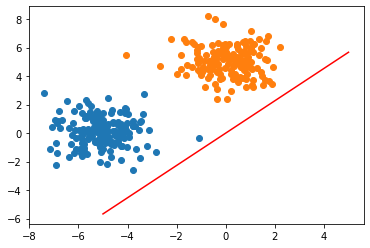

test acc: 1.0


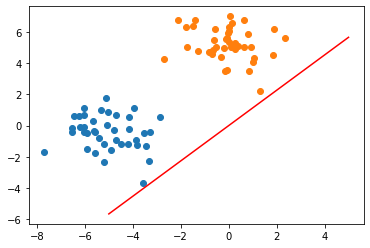

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math

X1 = np.random.multivariate_normal((-5,0), [[1,0],[0,1]], (200,), 'ignore') #二维正态分布

X2 = np.random.multivariate_normal((0,5), [[1,0],[0,1]], (200,), 'ignore')

X1_train = X1[:-40]
X1_test = X1[-40:]
X2_train = X2[:-40]
X2_test = X2[-40:]


data_fisher_train1 = np.vstack(np.c_[X1_train, np.ones(len(X1_train))])
data_fisher_train2 = np.vstack(np.c_[X2_train, [-1] * len(X2_train)])   
data_fisher_test1 = np.vstack(np.c_[X1_test, np.ones(len(X1_test))])
data_fisher_test2 = np.vstack(np.c_[X2_test, [-1] * len(X2_test)])   


data_fisher_train1 = np.array(data_fisher_train1)
data_fisher_train2 = np.array(data_fisher_train2)
X1 = data_fisher_train1[:,:-1]
X2 = data_fisher_train2[:,:-1]
X1_test = data_fisher_test1[:,:-1]
X2_test = data_fisher_test2[:,:-1]

def Fisher():
  mean1 = 0     #期望
  mean2 = 0
  for i in range(0,len(X1)):
    mean1 += X1[i]
  for i in range(0,len(X2)):
    mean2 += X2[i]
  mean1 /= len(X1)    #协方差 
  mean2 /= len(X2)

  covariance1 = 0 
  covariance2 = 0
  for i in range(0,len(X1)):
    covariance1 += np.transpose(np.mat(X1[i] - mean1)) * np.mat(X1[i] - mean1)
  for i in range(0,len(X2)):
    covariance2 += np.transpose(np.mat(X2[i] - mean2)) * np.mat(X2[i] - mean2) 
  Sw = covariance1 + covariance2    #类内总离差
  Sw_inverse = np.linalg.inv(Sw)      #类内总离差逆
  
  W = Sw_inverse * np.transpose(np.mat(mean1 - mean2))  #W最佳投影
  S_threshold = np.transpose(W) * np.transpose(np.mat(mean1 + mean2))/2 #门限

  acc = 0
  for i in range(0, len(X1)):
    if np.transpose(W) * np.transpose(np.mat(X1[i])) > S_threshold:
      acc += 1
  for i in range(0, len(X2)):
    if np.transpose(W) * np.transpose(np.mat(X2[i])) < S_threshold:
      acc += 1
  print("最佳门限投影W*:\n",W)
  print("判别门限s'",S_threshold)
  print("train acc:",acc/(len(X1)+len(X2)))

  plot_x = np.linspace(-5,5,1000)
  plot_y = W[0,0]/W[1,0]*plot_x
  plt.plot(plot_x, plot_y, 'r')

  plt.scatter(X1[:,0],X1[:,1])
  plt.scatter(X2[:,0],X2[:,1])
  plt.show()
  return W, S_threshold

def Fisher_test(W, S_threshold):
  acc = 0
  for i in range(0, len(X1_test)):
    if np.transpose(W) * np.transpose(np.mat(X1_test[i])) > S_threshold:
      acc += 1
  for i in range(0, len(X2_test)):
    if np.transpose(W) * np.transpose(np.mat(X2_test[i])) < S_threshold:
      acc += 1

  print("test acc:",acc/(len(X1_test)+len(X2_test)))
  plot_x = np.linspace(-5,5,1000)
  plot_y = W[0,0]/W[1,0]*plot_x
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X1_test[:,0],X1_test[:,1])
  plt.scatter(X2_test[:,0],X2_test[:,1])
  plt.show()
  

W, S_threshold = Fisher()
Fisher_test(W, S_threshold)